In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [398]:
file = r'D:\Learning\Data\Credit_Card_Customer_Clustering\CC GENERAL.csv'
data = pd.read_csv(file)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [399]:
data.shape

(8950, 18)

In [400]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [401]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


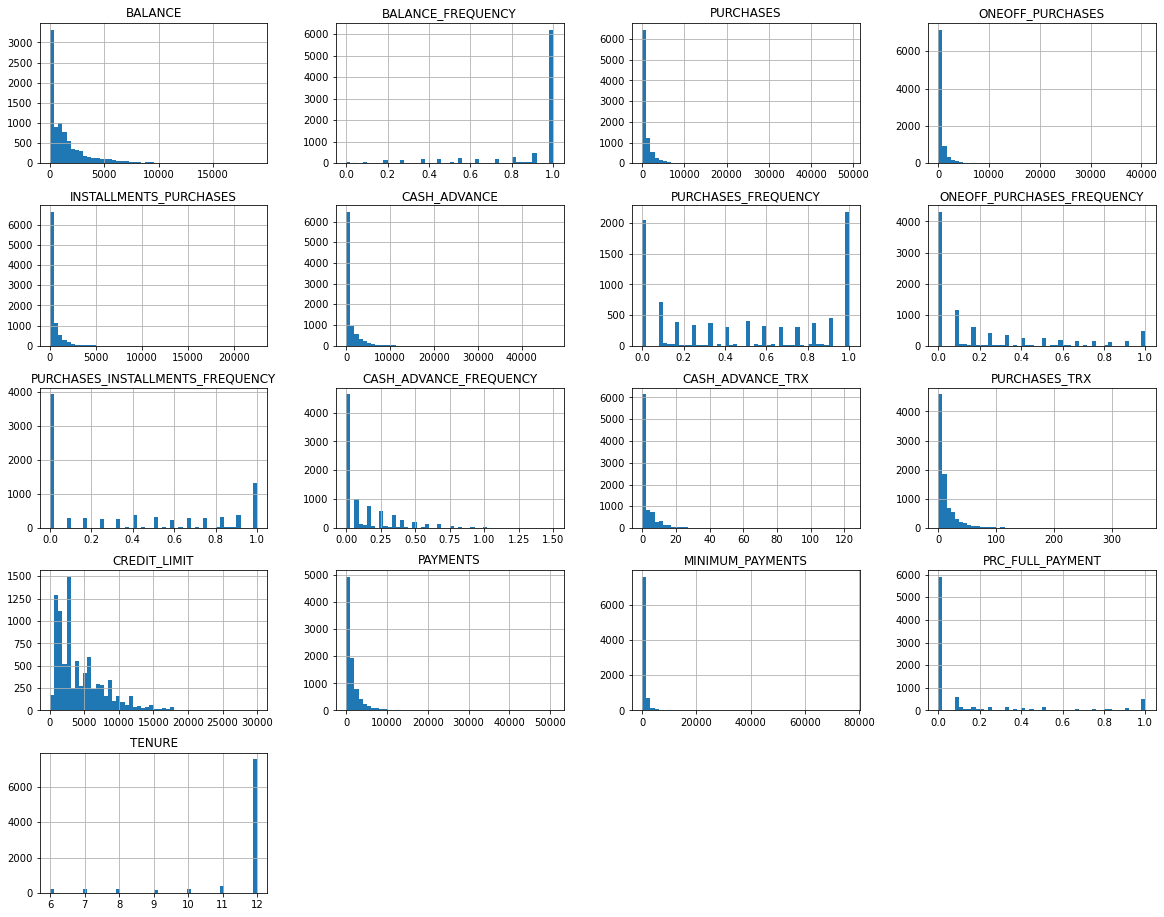

In [402]:
# Lets check the distribution of the features
data.hist(bins=50, figsize=(20,16))
plt.show()

In [403]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

__Observations__
- All the features are numerical 
- Total number of rows are 8950 and totals columns are 18
- As per descriptive analysis, we can confirm that the data contains outliers
- Features are not normarlly distributed, it contains skewness
- Minimum payment and Credit limit conatins NAN values

In [404]:
#Creating a backup dataframe
data_original = data.copy()

In [405]:
#data = data_original.copy()

In [406]:
# Handling the missing values 

#Replacing the NAN values in Minimum payment & Credit Limit with median of the records 
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())

In [407]:
# checking for the NAN values
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [408]:
df = data.drop(labels='CUST_ID',axis=1)

In [409]:
#Plotting the distribution using distplot

def distribution_check(dataset):
    
    plt.figure(figsize=(20,60))

    for i, feature in enumerate(df.columns):
        plt.subplot(9,2,i+1)
        ax = sns.distplot(data[feature])
        ax.set_title(feature.upper())
        plt.grid()
    plt.show()

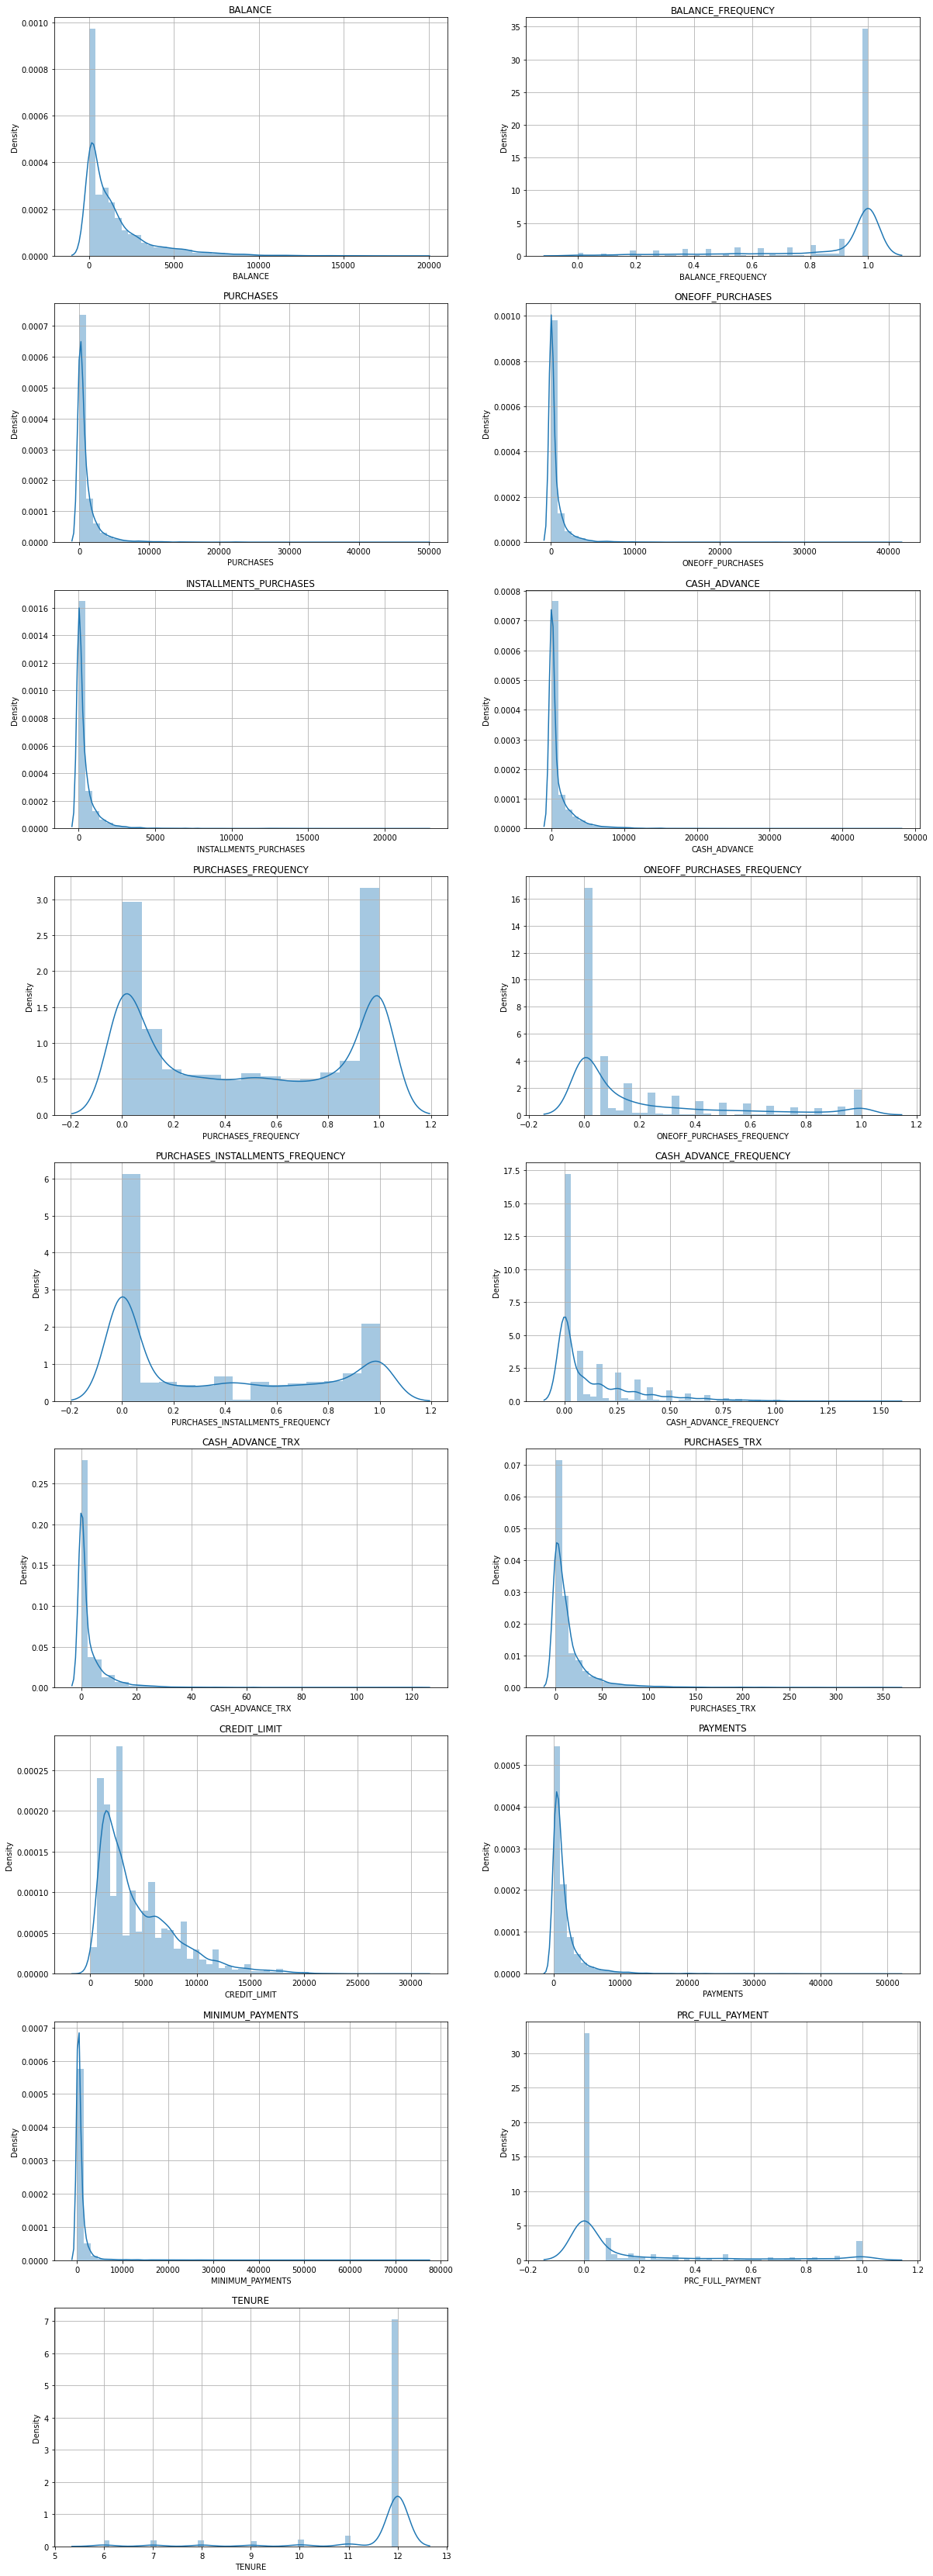

In [410]:
distribution_check(df)

In [411]:
df_skew = df.copy()

In [412]:
# Checking for the skewness in the feature
normal_skew = []
sqrt_skew = []
log_skew = []
for col in df.columns:
    print(col)
    print('Initial Skewness:',{df_skew[col].skew()})
    normal_skew.append(df_skew[col].skew())
    df_skew[col] = np.sqrt(df_skew[col])
    print('After applying Squre Root Transformation:',{df_skew[col].skew()})
    sqrt_skew.append(df_skew[col].skew())
    df_skew[col] = np.log(1 + df_skew[col])
    print('After applying Log Transformation:',{df_skew[col].skew()})
    log_skew.append(df_skew[col].skew())
    print('\n')

BALANCE
Initial Skewness: {2.393386042571806}
After applying Squre Root Transformation: {0.829497857072557}
After applying Log Transformation: {-0.8398948643393981}


BALANCE_FREQUENCY
Initial Skewness: {-2.0232655185149078}
After applying Squre Root Transformation: {-2.8194948567414535}
After applying Log Transformation: {-3.404548898503311}


PURCHASES
Initial Skewness: {8.144269064554651}
After applying Squre Root Transformation: {1.7307522561530275}
After applying Log Transformation: {-0.8085867176244975}


ONEOFF_PURCHASES
Initial Skewness: {10.045082884700278}
After applying Squre Root Transformation: {2.129460280033642}
After applying Log Transformation: {0.1599097779125735}


INSTALLMENTS_PURCHASES
Initial Skewness: {7.299119908745641}
After applying Squre Root Transformation: {1.5469393842026964}
After applying Log Transformation: {-0.05038162998503996}


CASH_ADVANCE
Initial Skewness: {5.166609074074723}
After applying Squre Root Transformation: {1.4861590004379295}
After app

In [413]:
normal_skew = pd.Series(normal_skew)
sqrt_skew = pd.Series(sqrt_skew)
log_skew = pd.Series(log_skew)

skew_data = pd.concat([normal_skew, sqrt_skew, log_skew], axis=1)
skew_data = pd.DataFrame(skew_data)

In [414]:
skew_data.columns = ['Normal','Squared', 'Log']
skew_data.index = df.columns

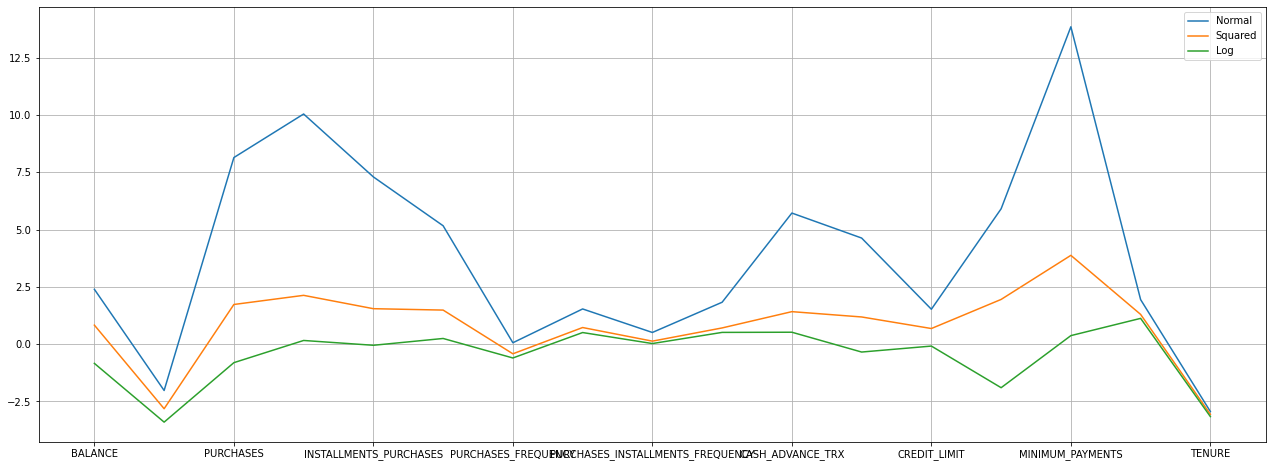

In [415]:
# Plotting the transformation
skew_data.plot(figsize=(22,8));
plt.grid()

In [416]:
# selecting the squre root tranformation on the columns with significant improvement to appBaly the change 
tran_cloumns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS' ]

In [417]:
transformed_df = df.copy()

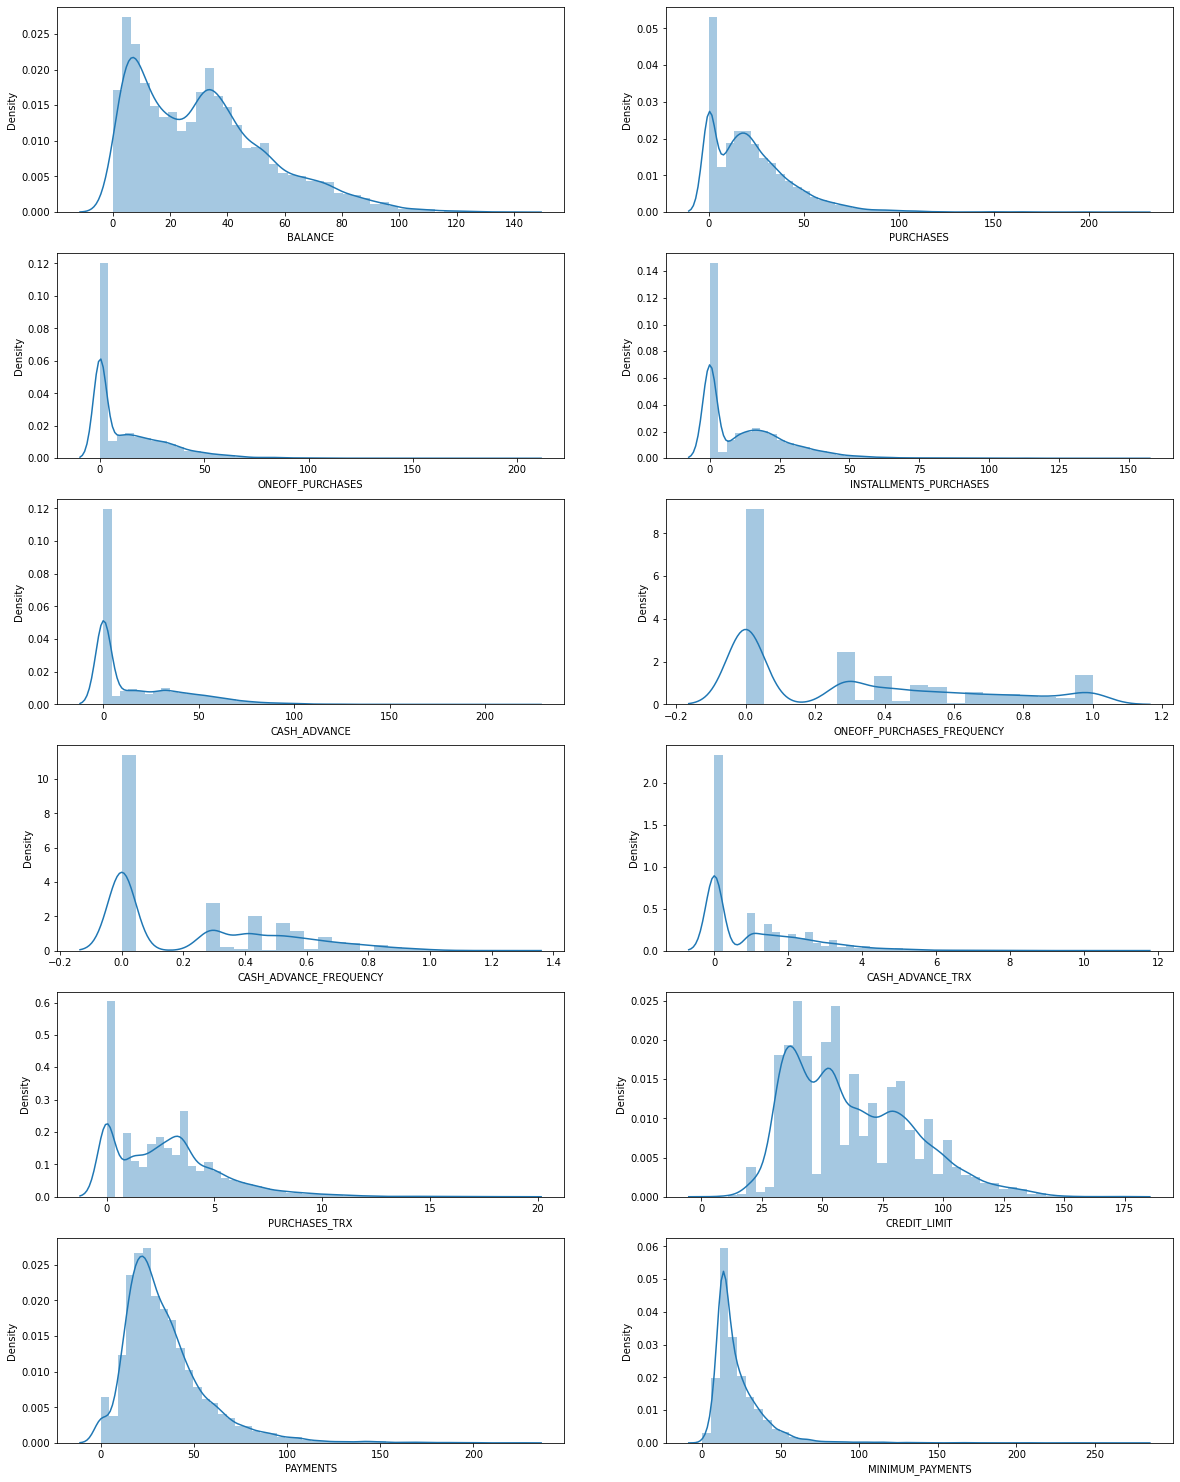

In [418]:
# performing the square root transformation 
plt.figure(figsize= (20,40))
for i, col in enumerate(tran_cloumns):
    plt.subplot(9,2,i+1)
    transformed_df[col] = np.sqrt(transformed_df[col])
    sns.distplot(transformed_df[col])        
plt.show()

__Observations__
- Features are now having less skewness

In [419]:
transformed_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.818182,9.767292,0.000000,9.767292,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,1.414214,31.622777,14.205706,11.811426,0.000000,12
1,56.590347,0.909091,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.0,0.000000,83.666003,64.054919,32.746606,0.222222,12
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,3.464102,86.602540,24.941266,25.045654,0.000000,12
3,40.824877,0.636364,38.716921,38.716921,0.000000,14.345313,0.083333,0.288675,0.000000,0.288675,1.0,1.000000,86.602540,0.000000,17.673255,0.000000,12
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.083333,0.288675,0.000000,0.000000,0.0,1.000000,34.641016,26.044861,15.645806,0.000000,12


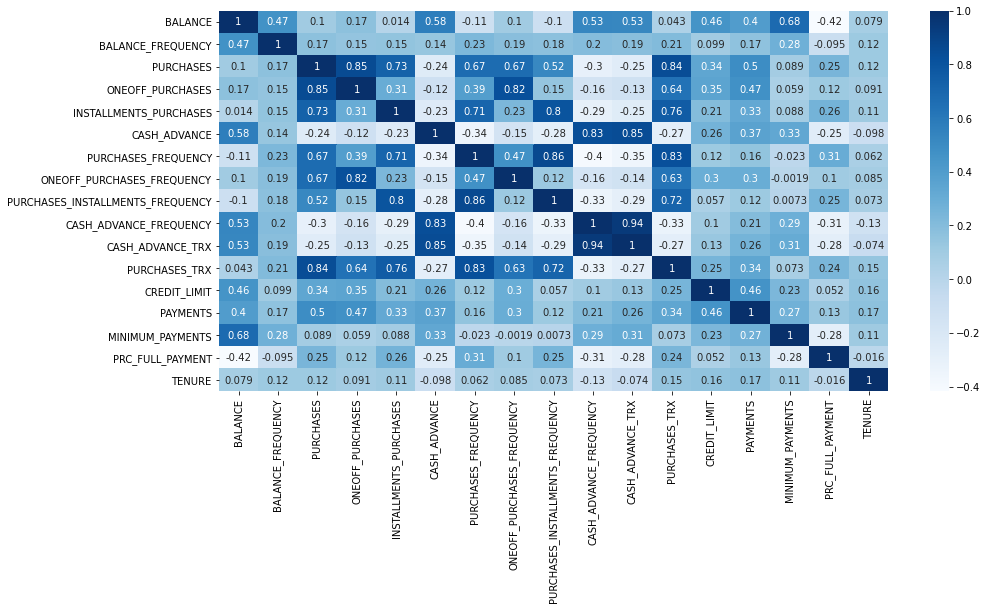

In [420]:
# checking the correlation 
plt.figure(figsize=(15,7))
sns.heatmap(transformed_df.corr(), annot=True, cmap='Blues')
plt.show()

In [421]:
# df_corr = transformed_df.corr().abs()
# upper_tri = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool))
# to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]

In [422]:
# performing standard scaler as the data is normally distributed 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(transformed_df)
scaled_df = pd.DataFrame(scaled_df, columns=transformed_df.columns)

In [423]:
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.078055,-0.249434,-0.596901,-0.724371,-0.209397,-0.732851,-0.806490,-0.881832,-0.707313,-0.861347,-0.772904,-0.578392,-1.212754,-0.885440,-0.644743,-0.525551,0.36068
1,1.053619,0.134325,-1.042337,-0.724371,-0.837899,2.447876,-1.221758,-0.881832,-0.916995,0.933739,0.629493,-1.136616,0.855567,1.274046,0.545992,0.234227,0.36068
2,0.771680,0.518084,0.225748,0.686250,-0.837899,-0.732851,1.269843,2.081316,-0.916995,-0.861347,-0.772904,0.230748,0.972272,-0.420372,0.107983,-0.525551,0.36068
3,0.384093,-1.016953,0.723342,1.239775,-0.837899,-0.164399,-1.014125,-0.026447,-0.916995,0.175044,-0.071706,-0.741892,0.972272,-1.500837,-0.311339,-0.525551,0.36068
4,-0.135254,0.518084,-0.859918,-0.521447,-0.837899,-0.732851,-1.014125,-0.026447,-0.916995,-0.861347,-0.772904,-0.741892,-1.092802,-0.372564,-0.426655,-0.525551,0.36068


In [424]:
# Using PCA for dimentionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_data = pca.fit_transform(transformed_df)
X_data = pd.DataFrame(X_data, columns=['A', 'B'])
X_data.head()

,A,B
0,-52.676385,4.665081
1,44.149314,-63.756781
2,13.455564,8.594348
3,7.112567,12.251309
4,-36.901729,-6.431090


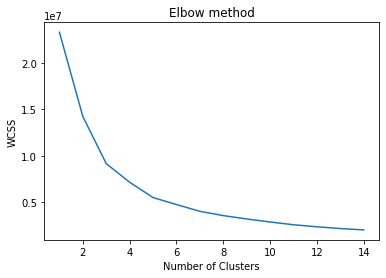

In [425]:
# Peforming KMeans 
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_data) for k in range (1, 15)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 15), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

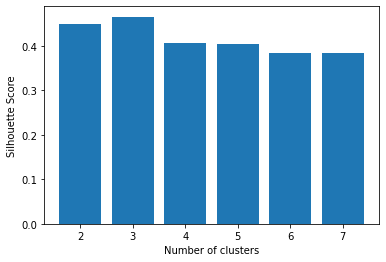

In [426]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for n_cluster in range(2, 8):
    k_lable = KMeans(n_clusters = n_cluster).fit_predict(X_data)
    silhouette_scores.append(silhouette_score(X_data, k_lable))
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [427]:
# based on the above score, we are selecting the n_cluster = 3
model = KMeans(n_clusters=3)
model.fit(scaled_df)
lable = model.labels_

In [431]:
cluster_df = data.copy()
cluster_df['label_kmeans'] = lable
cluster_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label_kmeans
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [436]:
#Visualization
visual_df = pd.concat((X_data, cluster_df['label_kmeans']), axis=1)
visual_df.head()

,A,B,label_kmeans
0,-52.676385,4.665081,0
1,44.149314,-63.756781,1
2,13.455564,8.594348,2
3,7.112567,12.251309,0
4,-36.901729,-6.431090,0


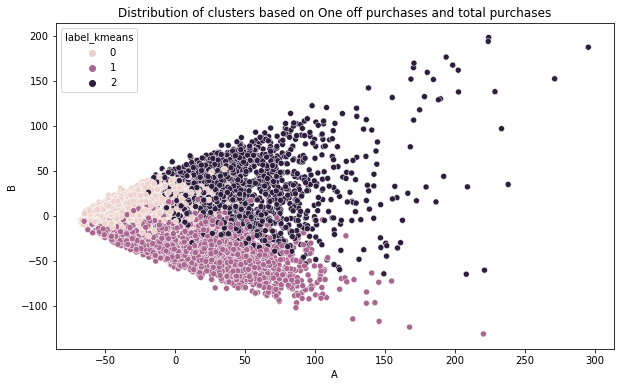

In [437]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=visual_df, x='A', y='B', hue='label_kmeans')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

In [442]:
# DBSCAN 
from sklearn.cluster import DBSCAN

In [465]:
r=np.linspace(0.5,10)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=10, metric='euclidean').fit(X_data)
    labels = db.labels_
    outlier=np.round((labels == -1).sum()/len(labels)*100,2)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)

For epsilon = 0.5 , percentage of outliers is:  99.25
For epsilon = 0.6938775510204082 , percentage of outliers is:  92.2
For epsilon = 0.8877551020408163 , percentage of outliers is:  81.72
For epsilon = 1.0816326530612246 , percentage of outliers is:  70.25
For epsilon = 1.2755102040816326 , percentage of outliers is:  59.18
For epsilon = 1.4693877551020407 , percentage of outliers is:  50.5
For epsilon = 1.663265306122449 , percentage of outliers is:  41.46
For epsilon = 1.8571428571428572 , percentage of outliers is:  33.6
For epsilon = 2.0510204081632653 , percentage of outliers is:  27.49
For epsilon = 2.2448979591836733 , percentage of outliers is:  23.66
For epsilon = 2.4387755102040813 , percentage of outliers is:  20.12
For epsilon = 2.63265306122449 , percentage of outliers is:  17.59
For epsilon = 2.826530612244898 , percentage of outliers is:  15.73
For epsilon = 3.020408163265306 , percentage of outliers is:  14.61
For epsilon = 3.2142857142857144 , percentage of outliers

In [471]:
db_scan = DBSCAN(eps=5, min_samples=10, metric='euclidean').fit(X_data)

In [472]:
cluster_df['label_dbscan'] = db_scan.labels_

In [473]:
cluster_df.label_dbscan.value_counts()

 0    8398
-1     491
 1      31
 2      14
 4       9
 3       7
Name: label_dbscan, dtype: int64

In [474]:
visual_df_dbscan = pd.concat((X_data, cluster_df['label_dbscan']), axis=1)

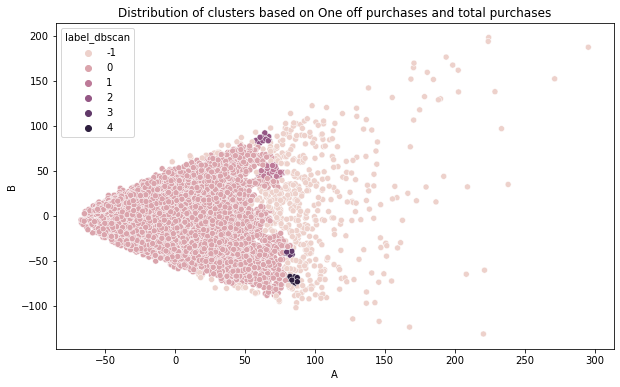

In [475]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=visual_df_dbscan, x='A', y='B', hue='label_dbscan')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

__Observation__
- DBSCAN is not a suitable clustering model for our dataset

In [476]:
# Hierachical Clustering
from sklearn.cluster import AgglomerativeClustering

In [477]:
for n_clusters in range(2,20):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(X_data)
    silhouette_avg = silhouette_score(X_data,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.4483987784954445
For n_clusters = 3 The average silhouette_score is: 0.46566062776086264
For n_clusters = 4 The average silhouette_score is: 0.32545867416884716
For n_clusters = 5 The average silhouette_score is: 0.3317900522507346
For n_clusters = 6 The average silhouette_score is: 0.3330180609087572
For n_clusters = 7 The average silhouette_score is: 0.3176479981324531
For n_clusters = 8 The average silhouette_score is: 0.3220477923220141
For n_clusters = 9 The average silhouette_score is: 0.3070201092314608
For n_clusters = 10 The average silhouette_score is: 0.3102059954421861
For n_clusters = 11 The average silhouette_score is: 0.3090872312170607
For n_clusters = 12 The average silhouette_score is: 0.3107505644532033
For n_clusters = 13 The average silhouette_score is: 0.3154688829999579
For n_clusters = 14 The average silhouette_score is: 0.3018136344126944
For n_clusters = 15 The average silhouette_score is: 0.303622324115183

In [486]:
# Selecting Cluster size as 3
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster_labels_hier = model.fit_predict(X_data)

In [487]:
cluster_labels_hier

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

In [492]:
cluster_df['lable_hierar'] = cluster_labels_hier

In [502]:
cluster_df.lable_hierar.value_counts()

0    6511
2    1362
1    1077
Name: lable_hierar, dtype: int64

In [497]:
visual_df_hier = pd.concat((X_data, cluster_df['lable_hierar']), axis=1)

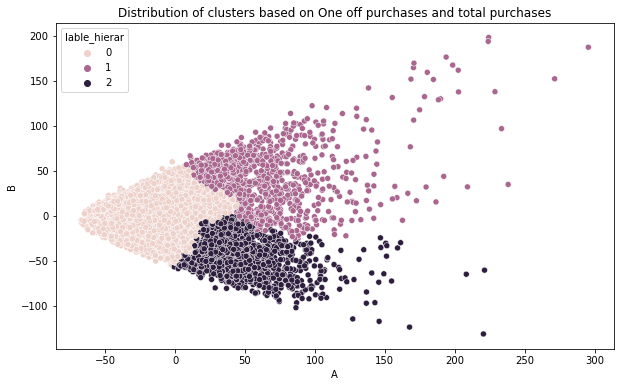

In [501]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=visual_df_hier, x='A', y='B', hue='lable_hierar')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

__Observation__
- Hirarchical clustering is working best on our dataset, there very data overlapping 
- This is suggested for further analysis

In [507]:
final_data = cluster_df.drop(['label_kmeans', 'label_dbscan'], axis=1

In [508]:
final_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,lable_hierar
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
